In [4]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install emukit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:

import numpy as np


import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel



In [7]:
##High fidelity output
def high_fidelity(X):
   return(6*X-2)**2*np.sin(12*X-4)
##Low fidelity output
def low_fidelity(X):
   return 0.5* ((6*X-2)**2*np.sin(12*X-4))+10*(X-0.5)-5

x_plot = np.linspace(0, 1, 200)[:, np.newaxis]
y_plot_l = low_fidelity(x_plot)
y_plot_h = high_fidelity(x_plot)

##High fidelity samples
x_train_h =  np.array([0,0.4,0.6,1.0])
x_train_h=x_train_h.reshape(-1,1)
##Low fidelity samples
x_train_l=np.linspace(0,1,11)
x_train_l=x_train_l.reshape(-1,1)


y_train_l = low_fidelity(x_train_l)
y_train_h = high_fidelity(x_train_h)

In [8]:


from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], 
                                                    [y_train_l, y_train_h])
print(Y_train)

[[-8.48639501]
 [-9.32828839]
 [-8.31986355]
 [-7.00778837]
 [-5.94261151]
 [-4.54535129]
 [-4.0747189 ]
 [-5.30287702]
 [-4.47456522]
 [ 1.85597517]
 [ 7.91486597]
 [ 3.02720998]
 [ 0.11477697]
 [-0.14943781]
 [15.82973195]]


In [9]:
kernels = [GPy.kern.RBF(1), GPy.kern.RBF(1)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)

array([0])

In [10]:

lin_mf_model = GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=100)



In [11]:
lin_mf_model.optimize()

 /usr/local/lib/python3.8/dist-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/100, f = 34.658061109676765
Optimization restart 2/100, f = 24.174999156963246
Optimization restart 3/100, f = 29.422153664683602
Optimization restart 4/100, f = 24.34480437532099
Optimization restart 5/100, f = 24.186261752830312
Optimization restart 6/100, f = 34.65806112021211
Optimization restart 7/100, f = 24.04684655177646
Optimization restart 8/100, f = 26.36434656239431
Optimization restart 9/100, f = 34.65806112020811
Optimization restart 10/100, f = 24.30264415288964
Optimization restart 11/100, f = 34.65806112020778
Optimization restart 12/100, f = 25.030921806729964
Optimization restart 13/100, f = 24.67902929702468
Optimization restart 14/100, f = 24.728906778589767
Optimization restart 15/100, f = 25.58812312886944
Optimization restart 16/100, f = 34.65958273420113
Optimization restart 17/100, f = 24.91036219208179
Optimization restart 18/100, f = 24.144176754589523
Optimization restart 19/100, f = 24.65428715117092
Optimization restart 20/100, f = 

In [12]:

X_plot = convert_x_list_to_array([x_plot, x_plot])
X_plot_l = X_plot[:len(x_plot)]
X_plot_h = X_plot[len(x_plot):]

In [13]:
kernel = GPy.kern.RBF(1)
high_gp_model = GPy.models.GPRegression(x_train_h, y_train_h, kernel)
high_gp_model.Gaussian_noise.fix(0)

array([0])

In [14]:
high_gp_model.optimize_restarts(100)

Optimization restart 1/100, f = 13.759352280846326
Optimization restart 2/100, f = 13.759352261430099
Optimization restart 3/100, f = 13.759352261422213
Optimization restart 4/100, f = 13.759352261548077
Optimization restart 5/100, f = 13.759352308156817
Optimization restart 6/100, f = 14.022835026613997
Optimization restart 7/100, f = 14.022835026640669
Optimization restart 8/100, f = 13.759352261413929
Optimization restart 9/100, f = 13.759352261413593
Optimization restart 10/100, f = 14.022835027765435
Optimization restart 11/100, f = 14.022835026820616
Optimization restart 12/100, f = 14.022835026297367
Optimization restart 13/100, f = 13.75935226490726
Optimization restart 14/100, f = 13.759352261420766
Optimization restart 15/100, f = 14.022835098518769
Optimization restart 16/100, f = 14.022835026381411
Optimization restart 17/100, f = 14.022835033991925
Optimization restart 18/100, f = 14.02283510661552
Optimization restart 19/100, f = 14.02283503711938
Optimization restart 20/

In [15]:
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)
hf_std_hf_gp_model = np.sqrt(hf_var_high_gp_model)

NameError: ignored

In [18]:
lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)
lf_std_lin_mf_model = np.sqrt(lf_var_lin_mf_model)
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)
hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)


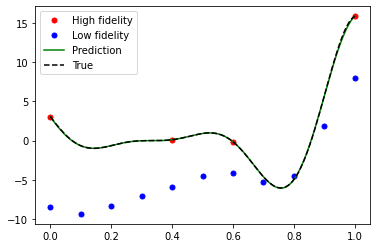

In [23]:
import matplotlib.pyplot as plt


plt.plot(x_train_h,y_train_h,'ro', markersize=5,label='High fidelity')

plt.plot(x_train_l,y_train_l,'bo', markersize=5,label='Low fidelity')
plt.plot(x_plot,hf_mean_lin_mf_model,'g-', label='Prediction')
plt.plot(x_plot,y_plot_h,'k--', label='True')
plt.legend()
plt.show()